In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

### Showing the cleaning steps for Best_jobs csv file

In [9]:
df1 = pd.read_csv("../resources/Best_jobs.csv")
del df1['crawled_at']
del df1['salary']
df1['education'] = df1['education'].str.replace("4 Year Degree","Bachelor's Degree")
df1['education'] = df1['education'].str.replace("2 Year Degree","Associate's Degree")
df1['education'] = df1['education'].str.replace("None","Other")
df1['education'] = df1['education'].str.replace("Some College","Associate's Degree")
df1['education'] = df1['education'].str.replace("Ph.D.","Doctorate")
df1['region'] = df1['region'].str.replace("Vega Baja","PR")
df1['region'] = df1['region'].str.replace("Gurabo","PR")
df1['region'] = df1['region'].str.replace("Juana Díaz","PR")
df1['region'] = df1['region'].str.replace("San Juan","PR")
df1['region'] = df1['region'].str.replace("Guaynabo","PR")
df1['region'] = df1['region'].str.replace("St Croix","US Virgin Islands")
df1['region'] = df1['region'].str.replace("St. Croix","US Virgin Islands")
df1['region'] = df1['region'].str.replace("Vega Baja","PR")
df1['region'] = df1['region'].str.replace("St. Thomas","US Virgin Islands")
df1['education'] = df1['education'].str.replace("Graduate Degree","Master's Degree")
df1 = df1.replace(np.nan, '', regex=True)
df1.dropna(subset = ["education"], inplace=True)

In [11]:
#Reading the Cleaned_Best_Jobs file 
degree_df = pd.read_csv('../resources/Cleaned_Best_Jobs.csv')

In [12]:
#Deleting the rows that are not needed for this ananlysis
del degree_df['Unnamed: 0']
del degree_df['country']
del degree_df['address']
del degree_df['description']
del degree_df['postalCode']
del degree_df['experience']
del degree_df['_id']


In [28]:
degree_df = degree_df.replace(np.nan, '', regex=True)
degree_df

,education,title,skills,locality,posted_at,longitude,latitude,company,region,employment_type
0,Bachelor's Degree,Head Start Teacher,Emergency Handling,Rochester,2021-04-21T20:20Z,-77.59785,43.15929,"Action for a Better Community, Inc.",NY,FULL_TIME
1,Master's Degree,Teacher of English for Online Groups!,"Vocabularies, Grammars, Teaching, Lesson Plann...",Atlanta,2021-04-16T04:49:23Z,-84.38799,33.74900,Magic Ears,GA,PART_TIME
2,Bachelor's Degree,CRM / PHP Developer,"PHP (Scripting Language), Debugging, Web Servi...",Duluth,2021-04-29T13:59:47Z,-84.17516,34.04884,ExecuSource,GA,FULL_TIME
3,High School,Automotive Service Advisor / Driver,"Driving, Service Delivery, Customer Service, A...",Topeka,2021-04-19T01:05:50Z,-95.68294,39.01264,Briggs Dodge Ram Fiat,KS,FULL_TIME
4,Bachelor's Degree,Licensed Nursing Home Administrator,"Emergency Handling, Training, Accounting, Heal...",Harlingen,2021-04-13T14:38:05Z,-97.65767,26.16793,Regency Integrated Health Services,TX,FULL_TIME
...,...,...,...,...,...,...,...,...,...,...
10483,Bachelor's Degree,Network Administrator,"Storage (Computing), Networking, Maintenance, ...",Troy,2021-04-23T11:58:48Z,-83.14977,42.60641,ICONMA,MI,FULL_TIME
10484,,Lead Direct Support Professional - LDSP,"Developmental Disabilities, Intellectual Disab...",Portland,2021-04-23T16:25:12Z,-122.82470,45.52726,Community Services Inc.,OR,FULL_TIME
10485,High School,Student Dorm Advisor,,Manchester,2021-04-12T16:45:38Z,-71.50194,43.02410,"Adams and Associates, Inc.",NH,FULL_TIME
10486,,Life Insurance Sales Position,"Life Insurance, Insurance, Success Driven, Mor...",Peoria,2021-04-15T01:07:38Z,-89.58899,40.69365,Family First Life Compassion,IL,FULL_TIME


In [29]:
#Showing Unique Degrees 
degree_df.education.unique()

array(["Bachelor's Degree", "Master's Degree", 'High School', '', 'Other',
       "Associate's Degree", 'Doctorate', 'Vocational Certificate'],
      dtype=object)

In [30]:
degree_df.groupby('education')['title'].count()

education
                          4338
Associate's Degree         767
Bachelor's Degree         1547
Doctorate                   25
High School               3023
Master's Degree            128
Other                      492
Vocational Certificate     168
Name: title, dtype: int64

### Bar chart of job opening based on the education

<AxesSubplot:xlabel='education'>

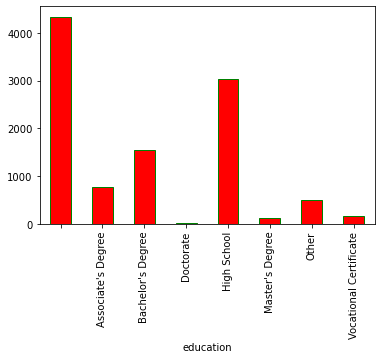

In [31]:
degree_df.groupby(['education']).size().plot(kind = "bar", color='r', edgecolor='g')

In [32]:
degree_df['employment_type'].unique()

array(['FULL_TIME', 'PART_TIME', 'CONTRACTOR', 'OTHER', 'TEMPORARY',
       'PER_DIEM', 'FULL_TIME, PART_TIME', 'INTERN'], dtype=object)

In [33]:
degree_df['employment_type'].value_counts()

FULL_TIME               8810
CONTRACTOR               589
PART_TIME                377
TEMPORARY                318
FULL_TIME, PART_TIME     298
PER_DIEM                  86
INTERN                     9
OTHER                      1
Name: employment_type, dtype: int64

### Bar chart of job openings based on employment_type

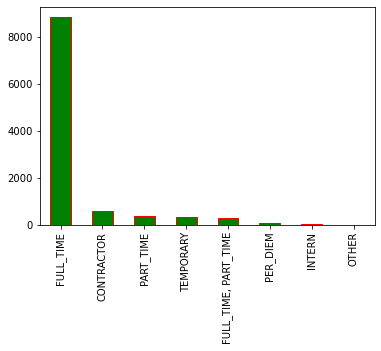

In [34]:
degree_df['employment_type'].value_counts().plot(kind='bar', color='g', edgecolor='r');

In [35]:
dfg = degree_df.groupby("region")['education'].count().reset_index()

fig = px.bar(dfg,
             y=degree_df.groupby("region")['education'].size(),
             x="region",
             color='region')
fig.show()

### Analysis of Master's and Doctorate degree openings 

In [36]:
filter_Doctorate_masters = ["Master's Degree", "Doctorate"]
Doctorate_masters_df = degree_df[degree_df.education.isin(filter_Doctorate_masters)]
# Doctorate_masters_df

In [37]:
Doctorate_masters_df.groupby('education')['region'].count()

education
Doctorate           25
Master's Degree    128
Name: region, dtype: int64

#### Bar Chart of job openings for Master's degree holders

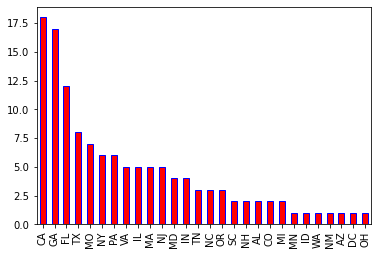

In [38]:
Masters_df = Doctorate_masters_df[Doctorate_masters_df["education"] == "Master's Degree"]
Masters_df['region'].value_counts().plot(kind='bar', color='r', edgecolor='b');

#### Bar Chart of job openings for Doctorate degree holders

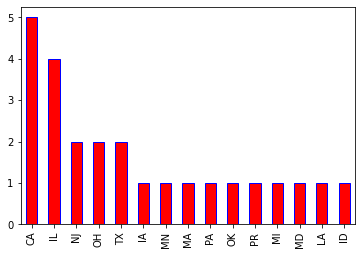

In [40]:
Doctorate_df = Doctorate_masters_df[Doctorate_masters_df["education"] == "Doctorate"]
Doctorate_df['region'].value_counts().plot(kind='bar', color='r', edgecolor='b');

#### Job openings for Master's and Doctorate degree holders in each state across US

In [42]:
fig = px.bar(Doctorate_masters_df, x="education", y="region", color="region",
            hover_data=['title'])
 
fig.show()

In [43]:
result_df = Doctorate_masters_df.sort_values(by = 'education')
result_df

,education,title,skills,locality,posted_at,longitude,latitude,company,region,employment_type
6372,Doctorate,Sales Representative,"Insurance, Microsoft Access, Hardworking And D...",Livonia,2021-05-04T01:04:46Z,-83.36826,42.36919,Confidential,MI,FULL_TIME
9197,Doctorate,Postdoctoral Scientist,"Nuclear Magnetic Resonance, Physical Chemistry...",New Brunswick,2021-04-16T11:48:52Z,-74.45182,40.48622,Analysts,NJ,CONTRACTOR
8962,Doctorate,Senior Human Factors Engineer,"Usability, User Interface Design, Usability Te...",Saint Paul,2021-04-13T17:35:16Z,-93.08996,44.95370,Abbott Laboratories,MN,FULL_TIME
6354,Doctorate,PROFESSIONAL LIABILITY ATTORNEY,"Professional Liability, Lawsuits, Civil Law, V...",Concord,2021-04-19T01:11:18Z,-122.03110,37.97798,Legal Specialists,CA,FULL_TIME
6388,Doctorate,Litigation/L&E Associate Attorney (Midlevel to...,"Attention Deficit Disorder (ADD), Team-working...",Chicago,2021-04-08T12:28:06Z,-87.63715,41.88177,Lucas Group,IL,FULL_TIME
...,...,...,...,...,...,...,...,...,...,...
3817,Master's Degree,Unit Therapist PRN,"Mental Health, Social Work, Psychotherapy, Fam...",Orlando,2021-04-14T00:42:34Z,-81.37923,28.53834,AdventHealth Orlando,FL,PER_DIEM
4032,Master's Degree,Labor Relations Associate,"Scheduling, Industrial Relations, Labor Relati...",New York,2021-04-29T18:14:30Z,-74.01000,40.71000,MetroPlus Health Plan,NY,FULL_TIME
4268,Master's Degree,Speech Language Pathologist SLP,"Articulation, Disabilities, Public Speaking, P...",New York,2021-04-23T14:25:27Z,-74.00597,40.71278,Apex Therapeutics,NY,FULL_TIME
3621,Master's Degree,Operations Supervisor-Swing Shift,"Client Rapport, Scheduling, Communication, Tim...",Aurora,2021-04-23T14:32:17Z,-104.78710,39.75425,Penske Truck Leasing,CO,FULL_TIME


In [44]:
fig = px.bar(result_df, x="region", y="education", color="region",
            hover_data=['title'], barmode = 'stack')
 
fig.show()

In [45]:
Doctorate_masters_df['employment_type'].unique()

array(['PART_TIME', 'FULL_TIME', 'TEMPORARY', 'CONTRACTOR', 'PER_DIEM'],
      dtype=object)

In [46]:
employement_category = Doctorate_masters_df.groupby('employment_type')['title'].count()
employement_category.reset_index()

,employment_type,title
0,CONTRACTOR,12
1,FULL_TIME,121
2,PART_TIME,12
3,PER_DIEM,5
4,TEMPORARY,3
